# Proyecto API DE LUISA

In [3]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dotenv import load_dotenv

# load the .env file variables
load_dotenv()

client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")


In [10]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# Solo el ID del artista, sin parámetros
artist_id = '790FomKkXshlbRYZFtlgla'

# Autenticación con credenciales desde variables de entorno
spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(
    client_id=client_id,
    client_secret=client_secret
))

# Obtener los 10 temas más populares del artista en EE.UU.
results = spotify.artist_top_tracks(artist_id, country='US')

# Mostrar los nombres de las canciones
for track in results['tracks']:
    print(track['name'])


Si Antes Te Hubiera Conocido
PROVENZA
+57
QLONA
TQG
AMARGURA
MI EX TENÍA RAZÓN
X SI VOLVEMOS
UNA NOCHE EN MEDELLÍN - REMIX
MAMIII


In [14]:
# Listas para guardar los datos
canciones = []
popularidad = []
duracion = []

# Recorremos los primeros 20 resultados
for track in results['tracks'][:20]:
    canciones.append(track['name'])
    popularidad.append(track['popularity'])
    # Convertimos duración de milisegundos a minutos con decimales
    duracion.append(track['duration_ms'] / 60000)

# Crear el DataFrame
datos = {
    'Titulo': canciones,
    'Popularidad': popularidad,
    'Duración': duracion
}

df = pd.DataFrame(datos)

# Ordenar por popularidad de menor a mayor
df = df.sort_values(by='Popularidad')

# Mostrar resultados
print(df)

                          Titulo  Popularidad  Duración
9                         MAMIII           77  3.768217
7                  X SI VOLVEMOS           79  3.335333
8  UNA NOCHE EN MEDELLÍN - REMIX           79  3.419067
6              MI EX TENÍA RAZÓN           82  2.572900
4                            TQG           83  3.298883
3                          QLONA           83  2.879950
1                       PROVENZA           83  3.460433
5                       AMARGURA           84  2.841333
2                            +57           85  4.968833
0   Si Antes Te Hubiera Conocido           94  3.263733


/tmp/ipykernel_11892/612582372.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


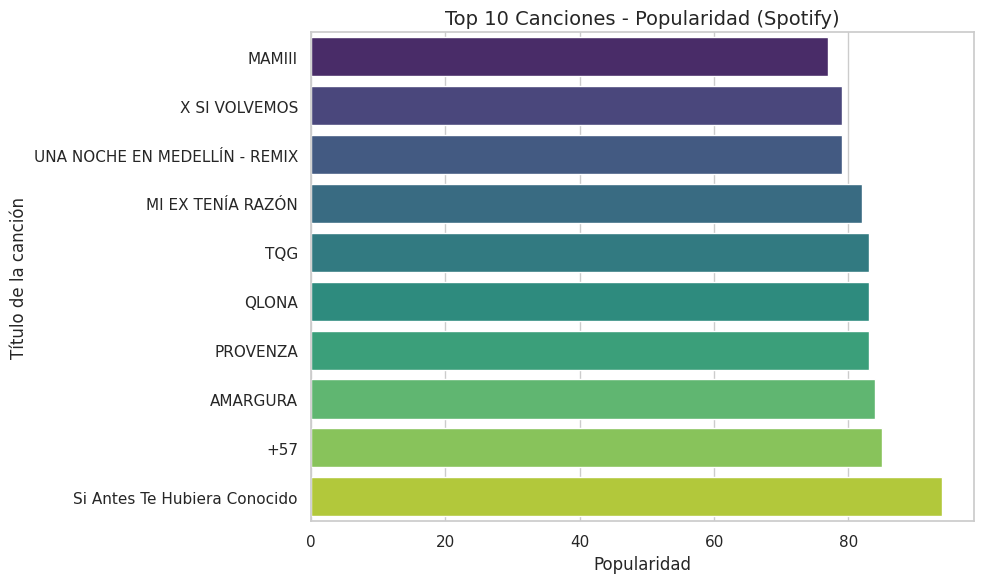

In [15]:
# Estilo visual de seaborn
sns.set(style='whitegrid')

# Tamaño de la figura
plt.figure(figsize=(10, 6))

# Gráfico de barras horizontales ordenado por popularidad
sns.barplot(
    x='Popularidad',
    y='Titulo',
    data=df,
    palette='viridis'
)

# Título y etiquetas
plt.title('Top 10 Canciones - Popularidad (Spotify)', fontsize=14)
plt.xlabel('Popularidad')
plt.ylabel('Título de la canción')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

CONCLUSIÓN: La gráfica revela que "Si Antes Te Hubiera Conocido" es la canción más popular entre las 10 analizadas, superando notablemente al resto, lo que sugiere un reciente auge en su difusión o una fuerte recepción del público. Aunque hay variaciones, la mayoría de las canciones mantienen una popularidad alta y bastante uniforme, lo que indica una base de oyentes fiel al artista. El uso de una gráfica de barras horizontales permite visualizar claramente las diferencias y facilita la lectura de títulos largos. En conjunto, los datos reflejan una carrera musical sólida y bien recibida, con varios éxitos competitivos en popularidad.
